<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#surprise" data-toc-modified-id="surprise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>surprise</a></span></li><li><span><a href="#ensemble" data-toc-modified-id="ensemble-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ensemble</a></span><ul class="toc-item"><li><span><a href="#bagging" data-toc-modified-id="bagging-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>bagging</a></span><ul class="toc-item"><li><span><a href="#GridSearchCV-+-Bagging" data-toc-modified-id="GridSearchCV-+-Bagging-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>GridSearchCV + Bagging</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#boosting" data-toc-modified-id="boosting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>boosting</a></span><ul class="toc-item"><li><span><a href="#xgboosting" data-toc-modified-id="xgboosting-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>xgboosting</a></span></li></ul></li><li><span><a href="#stacking" data-toc-modified-id="stacking-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>stacking</a></span></li></ul></li><li><span><a href="#Unsupervised-Learning" data-toc-modified-id="Unsupervised-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Unsupervised Learning</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>KMeans</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## surprise

surprise는 scikit-learn과 연동하는 추천시스템 라이브러리이다.  
유명하고 유용한 라이브라리만 모아놓은 [python awesome](https://github.com/vinta/awesome-python)에도 올라있다.

In [2]:
!pip install surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp37-cp37m-win_amd64.whl size=806116 sha256=448f154f93a922d27082e62ebad8624703a909ebda3fe7bcbf95c015fad4713d
  Stored in directory: c:\users\jinhyo\appdata\local\pip\cache\wheels\14\21\49\2712122e4f70026a9f8c7e0bb6b77fd1da5e84778ec27af6a7
Successfully built scikit-surprise


설치가 안되면 "visual c++ 14.0 is required" 문제인 경우가 대부분이다.
[다운로드 링크](https://visualstudio.microsoft.com/ko/vs/older-downloads/
)  
재배포 가능 패키지 무료로 설치 가능하다.

In [3]:
import surprise

처음 보면 항상 `dir`을 해본다.  
surprise는 scikit-learn을 베껴서 만들었기 때문에 익숙한 이름이 많이 보인다. 

In [6]:
dir(surprise) 

['AlgoBase',
 'BaselineOnly',
 'CoClustering',
 'Dataset',
 'KNNBaseline',
 'KNNBasic',
 'KNNWithMeans',
 'KNNWithZScore',
 'NMF',
 'NormalPredictor',
 'Prediction',
 'PredictionImpossible',
 'Reader',
 'SVD',
 'SVDpp',
 'SlopeOne',
 'Trainset',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'accuracy',
 'builtin_datasets',
 'dataset',
 'dump',
 'get_dataset_dir',
 'get_distribution',
 'model_selection',
 'prediction_algorithms',
 'reader',
 'similarities',
 'trainset',
 'utils']

`Dataset`은 데이터에 관련한 클래스이다.

In [7]:
from surprise import Dataset

In [187]:
data = Dataset.load_builtin() # 연습용 데이터 다운로드
                              # ml-100k : movie lens 영화 평점 데이터

In [9]:
dir(data) # 처음 보면 dir

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'build_full_trainset',
 'construct_testset',
 'construct_trainset',
 'has_been_split',
 'load_builtin',
 'load_from_df',
 'load_from_file',
 'load_from_folds',
 'ratings_file',
 'raw_ratings',
 'read_ratings',
 'reader']

`raw_ratings`에는 날 데이터가 들어있다. 

In [235]:
Dataset.load_builtin().raw_ratings

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013'),
 ('62', '257', 2.0, '879372434'),
 ('286', '1014', 5.0, '879781125'),
 ('200', '222', 5.0, '876042340'),
 ('210', '40', 3.0, '891035994'),
 ('224', '29', 3.0, '888104457'),
 ('303', '785', 3.0, '879485318'),
 ('122', '387', 5.0, '879270459'),
 ('194', '274', 2.0, '879539794'),
 ('291', '1042', 4.0, '874834944'),
 ('234', '1184', 2.0, '892079237'),
 ('119', '392', 4.0, '886176814'),
 ('167', '486', 4.0, '892738452'),
 ('299', '144', 4.0, '877881320'),
 ('291', '118', 2.0, '874833878'),
 ('308', '1', 4.0, '887736532'),
 ('95', '546', 2.0, '879196566'),
 ('38', '95', 5.0, '892430094'),
 ('102', '768', 2.0, '883748450'),
 ('63', '277', 4.0, '875747401

출력 중략...

다루기 편하게 pandas DataFrame으로 바꿔보자

In [10]:
import pandas as pd

In [13]:
# 이 연습용 데이터는 3월 10일에 실습했던 영화 평점 데이터와 동일함 (ratings.csv)
# column명은 알고 있는 이름을 씀
data_p = pd.DataFrame(data.raw_ratings, columns=["user_id", "movie_id", "rating","timestamp"]) 

In [14]:
# timestamp는 추천에 사용하지 않을 것이므로 버림
data_p.drop(columns="timestamp", inplace=True)

In [15]:
data_p

,user_id,movie_id,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
...,...,...,...
99995,880,476,3.0
99996,716,204,5.0
99997,276,1090,1.0
99998,13,225,2.0


`info`를 보면 user_id, movie_id가 문자열이다.  
기계학습을 하기 위해서는 숫자 데이터로 바꿔줘야 한다.

In [23]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
user_id     100000 non-null object
movie_id    100000 non-null object
rating      100000 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


`to_numeric`은 숫자 데이터로 타입을 바꿔주는 pandas 기능이다.  
이름에 to_가 붙은 녀석들은 편리하다.  
타입 변환할 때 error가 발생하면 어떻게 처리할지도 정할 수 있다.(`errors` 옵션)

In [24]:
pd.to_numeric(data_p.user_id)

0        196
1        186
2         22
3        244
4        166
        ... 
99995    880
99996    716
99997    276
99998     13
99999     12
Name: user_id, Length: 100000, dtype: int64

`astype`은 타입 변환하는 numpy의 기능이다.  
pandas는 numpy를 기반으로 만들었기 때문에 사용 가능하다. 

In [27]:
data_p.movie_id.astype("int64")

0         242
1         302
2         377
3          51
4         346
         ... 
99995     476
99996     204
99997    1090
99998     225
99999     203
Name: movie_id, Length: 100000, dtype: int64

재할당해서 data_p에 변경결과를 반영한다.

In [28]:
data_p.user_id = pd.to_numeric(data_p.user_id)
data_p["movie_id"] = data_p.movie_id.astype("int64")

추천 시스템 만들 때 유저-영화 DataFrame 만들었던 것 잠깐 복습해보자.

In [20]:
recom1 = data_p.set_index(["user_id", "movie_id"]).unstack().fillna(0)

In [21]:
recom1

rating                                               ...            \
movie_id      1   10  100 1000 1001 1002 1003 1004 1005 1006  ...  990  991   
user_id                                                       ...             
1           5.0  3.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
10          4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
100         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  3.0  0.0   
101         3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
102         3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95          5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
96          5.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
97          4.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
98          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
99          4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                                  
movie_id  992  993  994  995  996  997  998  999  
user_id                                           
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
100       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
101       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
102       0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
95        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
96        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
97        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
98        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[943 rows x 1682 columns]

`imshow`은 이미지(array)를 시각화하는 기능인데 0이면 검은색으로 나온다.  
여기에 착안하여, `imshow`를 0인 값을 체크하는 용도로 쓸 수도 있다.  
전반적으로 0이 매우 많음을 시각적으로 알 수 있다.

In [ ]:
import matplotlib.pyplot as plt

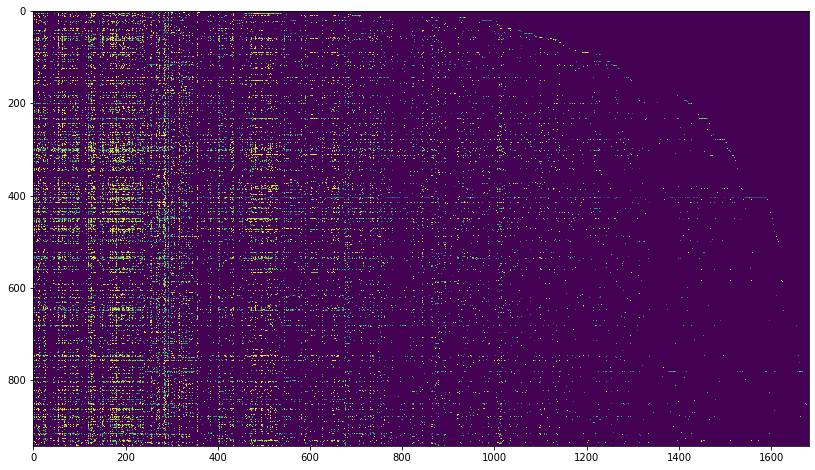

In [35]:
plt.figure(figsize=(20,8)) 
plt.imshow(recom1)

`surprise`는 scikit-learn을 베껴서 만들었다.  
모듈과 함수 위치도 같다.

In [36]:
from surprise.model_selection import KFold

In [188]:
kf = KFold()

generator이면 `next`해본다.

In [236]:
kf.split(data)

<generator object KFold.split at 0x000001EE8FE63318>

In [237]:
t = kf.split(data)

In [238]:
next(t)

(<surprise.trainset.Trainset at 0x1ee96da2a58>,
 [('181', '1334', 1.0),
  ('233', '192', 5.0),
  ('889', '520', 4.0),
  ('886', '171', 4.0),
  ('897', '485', 3.0),
  ('779', '1028', 4.0),
  ('378', '956', 3.0),
  ('394', '174', 5.0),
  ('363', '183', 4.0),
  ('128', '258', 2.0),
  ('90', '273', 3.0),
  ('345', '258', 4.0),
  ('901', '1620', 5.0),
  ('459', '568', 3.0),
  ('817', '329', 4.0),
  ('575', '427', 4.0),
  ('407', '40', 1.0),
  ('608', '469', 3.0),
  ('531', '323', 5.0),
  ('60', '194', 4.0),
  ('72', '1148', 4.0),
  ('158', '729', 3.0),
  ('498', '475', 3.0),
  ('514', '306', 4.0),
  ('65', '661', 4.0),
  ('880', '177', 5.0),
  ('44', '507', 3.0),
  ('288', '289', 3.0),
  ('922', '476', 1.0),
  ('208', '216', 5.0),
  ('303', '741', 4.0),
  ('572', '1010', 2.0),
  ('221', '335', 4.0),
  ('815', '919', 5.0),
  ('152', '133', 5.0),
  ('443', '333', 5.0),
  ('911', '313', 2.0),
  ('863', '902', 5.0),
  ('339', '88', 4.0),
  ('766', '65', 4.0),
  ('913', '202', 4.0),
  ('158', '5

출력 중략...

괄호로 묶여 있고 내용이 길면 `len` 테크닉을 사용한다.

In [44]:
len(next(t)) # (train, test)

2

In [193]:
tr, te = next(t)

surprise에서 알고리즘은 바로 쓸 수 있다. scikit-learn처럼 모듈로 나눠져있지 않다.

In [38]:
from surprise import BaselineOnly

In [192]:
al = BaselineOnly()

In [195]:
al.fit(tr) # 학습은 fit

Estimating biases using als...


surprise는 scikit-learn과 거의 똑같은데, 점수 내는 것만 다르다.  
`predict` 대신 `test`를 사용한다.

In [239]:
al.test(te)

[Prediction(uid='158', iid='686', r_ui=5.0, est=3.72470654036081, details={'was_impossible': False}),
 Prediction(uid='798', iid='740', r_ui=2.0, est=3.488208799259356, details={'was_impossible': False}),
 Prediction(uid='878', iid='432', r_ui=3.0, est=3.3181929518219837, details={'was_impossible': False}),
 Prediction(uid='130', iid='398', r_ui=3.0, est=3.283100001137243, details={'was_impossible': False}),
 Prediction(uid='130', iid='62', r_ui=4.0, est=3.790930628584373, details={'was_impossible': False}),
 Prediction(uid='764', iid='86', r_ui=3.0, est=4.131050718755156, details={'was_impossible': False}),
 Prediction(uid='511', iid='346', r_ui=4.0, est=3.9996605292626812, details={'was_impossible': False}),
 Prediction(uid='731', iid='66', r_ui=4.0, est=3.0814704154421815, details={'was_impossible': False}),
 Prediction(uid='13', iid='202', r_ui=5.0, est=3.3674543103848027, details={'was_impossible': False}),
 Prediction(uid='201', iid='431', r_ui=1.0, est=3.0098607225397593, detail

출력 중략...

성능 측정할 때는 `test`한 결과를 평가 함수에 넣는다.  
평가함수는 `accuracy` 모듈에 있다. 

In [48]:
from surprise.accuracy import rmse

In [240]:
rmse(al.test(te)) # Root Mean Square Error

RMSE: 0.9456


0.9456219470993773

surprise는 `cross_val_score`가 없다.  
`Kfold`를 이용해서 직접 구현해보자.

In [49]:
# scikit-learn의 cross_val_score 처럼 만들기

temp = []
for tr, te in kf.split(data):
    al = BaselineOnly()
    al.fit(tr)
    temp.append(rmse(al.test(te)))

Estimating biases using als...
RMSE: 0.9428
Estimating biases using als...
RMSE: 0.9425
Estimating biases using als...
RMSE: 0.9471
Estimating biases using als...
RMSE: 0.9405
Estimating biases using als...
RMSE: 0.9463


In [50]:
temp

[0.9428489324074377,
 0.942452133129686,
 0.9470930090034326,
 0.9404736670622638,
 0.946273482560421]

`cross_validate`는 scikit-learn과 같다.

In [51]:
from surprise.model_selection import cross_validate 

In [52]:
from surprise import KNNBaseline

In [248]:
al = KNNBaseline() # KNN 알고리즘을 써보자

In [255]:
cross_validate(al, data, cv=10, n_jobs=-1)

{'test_rmse': array([0.92932768, 0.92542245, 0.93063691, 0.92889879, 0.921975  ,
        0.92279328, 0.92173675, 0.93270561, 0.93631913, 0.91504057]),
 'test_mae': array([0.73075579, 0.73121136, 0.73281927, 0.72821672, 0.73047717,
        0.7281322 , 0.72681122, 0.7321038 , 0.73562601, 0.71942607]),
 'fit_time': (0.3580014705657959,
  0.3769974708557129,
  0.38199901580810547,
  0.3769984245300293,
  0.37199974060058594,
  0.3750009536743164,
  0.35799622535705566,
  0.36400508880615234,
  0.5019984245300293,
  0.3379952907562256),
 'test_time': (3.094000816345215,
  2.898998498916626,
  2.6900405883789062,
  2.8330817222595215,
  2.681002140045166,
  2.752002716064453,
  2.917999744415283,
  2.769995927810669,
  2.807997465133667,
  2.651050090789795)}

`train_test_split`도 있다.

In [37]:
from surprise.model_selection import train_test_split

In [259]:
tr, te = train_test_split(data)

In [260]:
al.fit(tr)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


user_id, movie_id로 평점을 예측할 수 있다.

In [280]:
te[0] # user_id, movie_id, rating

('713', '539', 3.0)

In [282]:
al.predict(*te[0]) # user_id, movie_id, rating(true), rating(prediction), details

Prediction(uid='713', iid='539', r_ui=3.0, est=2.236383763903154, details={'actual_k': 29, 'was_impossible': False})

## ensemble

In [56]:
from sklearn.datasets import load_iris

In [57]:
data = load_iris()

In [58]:
data_ = pd.DataFrame(data.data, columns=data.feature_names)

In [59]:
data_t = pd.DataFrame(data.target, columns=["target"])

In [60]:
iris = pd.concat([data_, data_t], axis=1)

### bagging
- 전체 데이터를 뽑는게 아니라, 일부만 뽑아서 여러 모델 만든 다음, 평균 내는 방법이다.
- 평균을 내면 편차가 줄어드는 이점이 있다.
- 오버피팅이면 편차가 커지는데, 오버피팅이 줄어드는 효과가 있다. 
- 데이터를 적게 쓰기 때문에 성능은 조금 떨어질 수 있지만, 오버피팅이 더 심한 문제이다.
- 머신러닝에서 많이 쓴다. 
- 딥러닝도 bagging 쓸 수 있는데, 효과가 별로 없다.

In [62]:
from sklearn.ensemble import BaggingClassifier

In [63]:
from sklearn.linear_model import LogisticRegression

ensemble은 여러 모델을 만들기 위해서 알고리즘이 필요하다.  
따라서 `base_estimator`는 필수 인자이다.  
`n_estimator`는 모델을 몇 개 만들 것인지 고르는 옵션이다. 기본값은 10이다.

In [319]:
bc = BaggingClassifier(LogisticRegression()) 

`LogisiticRegression` 모델 10개를 만든 뒤, 묶어서 1개가 된다.  
성능을 측정해보자.

In [65]:
from sklearn.model_selection import cross_val_score

In [320]:
# 경고메시지가 길어서 숨김
cross_val_score(bc, iris.iloc[:, :-1], iris.iloc[:, -1])

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

bagging하지 않고 `LogisticRegression` 모델 하나만 만들었을 때와 성능을 비교해보자.  
성능은 bagging 안 했을 때가 조금 더 좋다.  
하지만 오버피팅에 걸릴 가능성은 bagging이 더 낮다.

In [67]:
cross_val_score(LogisticRegression(), iris.iloc[:, :-1], iris.iloc[:, -1])

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

#### GridSearchCV + Bagging

In [68]:
from sklearn.model_selection import GridSearchCV

In [110]:
bc = BaggingClassifier(LogisticRegression())

`GridSearchCV`를 사용하기 위해 `get_params`를 살펴본다.

In [111]:
bc.get_params()

{'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 100,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': None,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_j

`GridSearchCV`와 `BaggingClassifier`는 잘 연동된다.

In [321]:
grid = GridSearchCV(bc, {"base_estimator__C":[1, 10, 100]})

In [322]:
# 경고메시지가 길어서 숨김
grid.fit(iris.iloc[:, :-1], iris.iloc[:, -1])

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='auto',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                                        

In [114]:
grid.best_params_

{'base_estimator__C': 1}

`base_estimator`와 그 하이퍼 파라미터도 `GridSearchCV`로 한번에 찾을 수 있다.  

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [323]:
grid = GridSearchCV(
    estimator=BaggingClassifier(), 
    param_grid=[{"base_estimator":[LogisticRegression()], "base_estimator__C":[1, 10, 100]},
                {"base_estimator":[KNeighborsClassifier()], "base_estimator__n_neighbors":[2, 3, 4, 5]}]
)

In [324]:
# 경고메시지가 길어서 숨김
grid.fit(iris.iloc[:, :-1], iris.iloc[:, -1])

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'base_estimator': [LogisticRegression(C=1.0,
                                                                class_weight=None...
                                                                tol=0.0001,
                                                                verbose=0,
                                                                warm_start=False)],
                          'base_estimator__C': [1, 10, 100]},
                        

In [117]:
grid.best_params_

{'base_estimator': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), 'base_estimator__C': 10}

#### RandomForestClassifier

- DecisionTree를 bagging한 것이 RandomForeset이다.
- 성능이 좋다. 
    - No Free Lunch 이지만,
    - random forest는 대충 일반적으로 쓰면 성능이 좋은 모델이다.
- 오버피팅도 잘 안 난다.
- 한 때, 아주 잘 나갔던 알고리즘이다.
    - 현재는 xgboosting, lighGBM이 대세이다.
- feature의 중요성을 알려주므로 feature selection도 가능하다.
- 통계학자가 만들어서 통계쪽에서는 아주 깊게 배운다.

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rf = RandomForestClassifier() # 태생적으로 앙상블인 알고리즘

In [120]:
rf.fit(iris.iloc[:, :-1], iris.iloc[:, -1]) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
rf.feature_importances_ # feature selection도 가능하다.

array([0.09427731, 0.02292946, 0.42940504, 0.45338819])

### boosting
- 여러개의 약한 분류기들을 합쳐서 강한 분류기 한 개를 만들어낸다.
- 잘하는 애들한테 가중치를 더 준다.

In [283]:
from sklearn.ensemble import AdaBoostClassifier

In [284]:
ac = AdaBoostClassifier(LogisticRegression())

In [285]:
cross_val_score(ac, iris.iloc[:, :-1], iris.iloc[:, -1]) 

array([0.93333333, 0.96666667, 0.9       , 0.93333333, 0.93333333])

#### xgboosting

- 요즘 제일 핫한 알고리즘은 xgboosting이다.  
- xgboosting은 scikit-learn에 없어서 다른 라이브러리를 써야한다.  
    - 하지만 scikit-learn과 100% 호환이 된다. 

In [89]:
!pip install xgboost

In [288]:
from xgboost import XGBClassifier

In [289]:
xg = XGBClassifier()

In [290]:
cross_val_score(xg, iris.iloc[:, :-1], iris.iloc[:, -1]) # scikit-learn 함수와 연동

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### stacking

stacking은 예측값을 다시 학습해서 예측모델로 만든다.  
voting보다 훨씬 더 우아하다.

예를 들어 A모델, B모델, C모델을 만들면, 
- -> A 모델의 예측값을 학습해서 B모델을 만들고, B모델의 예측값을 학습해서 C모델을 만든다.
- -> 쌓아서 만든다고 해서 스택킹 모델이라고 함.

In [122]:
from sklearn.ensemble import StackingClassifier

파라미터를 살펴보면 estimator's'이므로 복수의 알고리즘을 넣을 수 있다.  
예측한 걸로 학습하기 때문에 가장 마지막에 예측할 알고리즘이 필요하다. `final_estimator` 옵션은 선택이다.  
final은 너무 똑똑한 애를 안써도 된다는 경험적 법칙이 있다. 주로 logisticregresssion 쓴다. 

In [123]:
sc = StackingClassifier([LogisticRegression(), KNeighborsClassifier()])

In [125]:
# 학습에 실패서 None이 나왔다.
cross_val_score(sc, iris.iloc[:, :-1], iris.iloc[:, -1], cv=10)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: zip argument #1 must support iteration

  FitFailedWarning)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

파라미터 설명을 잘 읽어보면 이름과 estimator를 리스트 안에 튜플 형태로 사용하라고 한다.  
`Pipeline`과 `VotingClassifier`에서도 이러한 형태를 사용했다.

> estimators : list of (str, estimator)  
    &nbsp;&nbsp;&nbsp;&nbsp; Base estimators which will be stacked together. Each element of the  
    &nbsp;&nbsp;&nbsp;&nbsp; list is defined as a tuple of string (i.e. name) and an estimator  
    &nbsp;&nbsp;&nbsp;&nbsp; instance. An estimator can be set to 'drop' using `set_params`.

In [325]:
sc = StackingClassifier([("lr", LogisticRegression()), ("knn", KNeighborsClassifier())])

In [326]:
# 경고메시지가 길어서 숨김
cross_val_score(sc, iris.iloc[:, :-1], iris.iloc[:, -1], cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

- stacking 이 현재 최고의 앙상블 기법이다.  
- xgboosting으로 학습 한 후에 stacking하는 것도 가능하다. 하지만 오버피팅을 조심해야한다.  
- 그러나, 기계학습에서는 알고리즘 바꾸는 것 보다 데이터 전처리가 더 성능이 더 좋다. 

## Unsupervised Learning

- 현실에는 라벨(정답, target 값)이 없는 데이터가 압도적으로 더 많다.  
- 라벨이 없을 때 쓰는게 unsupervised learning(비지도 학습)이다.
- 정답 데이터 만드는 것을 라벨링이라고 한다.  
    - Unsupervised Learning을 데이터 라벨링에 쓸 수도 있다.
- 전통적인 기계학습에서는 unsupervised learning는 할 수 있는게 제한적이다.
    - supervised가 1이라고 하면, unsupervised는 0.1도 안된다.
    - 딥러닝에서는 unsupervised learning으로 할 수 있는게 많아졌다. 
   
※ 참고 : semi-supervised learning이라고 라벨이 있는 데이터와 라벨이 없는 데이터를 혼용해서 학습하는 기법도 있다. 

### KMeans

`KMeans`는 데이터를 K개의 군집으로 나누는 비지도학습 알고리즘이다. 군집화(Clustering) 알고리즘 중 하나이기도 하다.  
몇 개의 군집으로 나눌 것인지는 사용자가 지정해야한다.(하이퍼 파라미터)

In [136]:
import mglearn

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


(Initialization) 처음에 랜덤하게 K개의 점(center)을 찍는다. 각각의 점은 어떤 군집을 의미한다.  
(Assign Points) 데이터와 점들의 거리를 측정한다. 데이터로부터 가장 가까운 점으로 군집을 할당한다.  
(Rcompute Centers) 군집 내의 데이터의 중앙점을 찾는다. 점(center)을 중앙점으로 옮긴다.  
Assign Points와 Recompute Centers 단계를 반복한다.

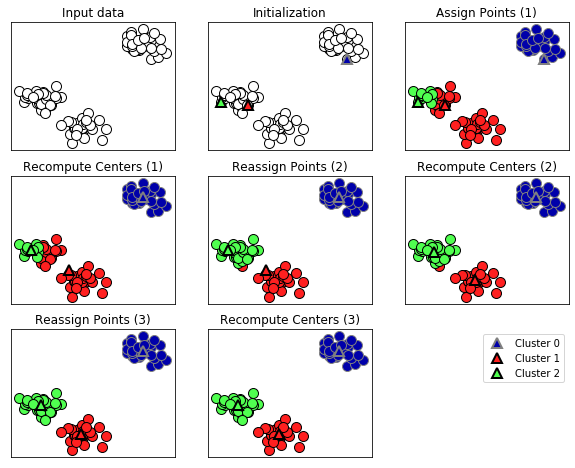

In [138]:
mglearn.plot_kmeans.plot_kmeans_algorithm()

In [131]:
from sklearn.cluster import KMeans

In [134]:
km = KMeans(3) # Kmeans에서 K는 하이퍼파라미터이다.
               # 몇 묶음로 묶을 것인가.

비지도 학습이므로 y를 안 쓰고 `fit`한다.

In [135]:
km.fit(iris.iloc[:, :-1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
vars(km)

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'auto',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': None,
 'algorithm': 'auto',
 'cluster_centers_': array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]),
 'inertia_': 78.85144142614601,
 'n_iter_': 5}

실제 target과 KMeans로 만든 군집이 같은지 비교해보자

In [139]:
import numpy as np

In [141]:
km.labels_ == iris.target

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146    False
147     True
148     True
149    False
Name: target, Length: 150, dtype: bool

In [140]:
np.sum(km.labels_ == iris.target) # 겨우 36개 맞췄다?

36

바로 비교할 수 없다. `KMeans`는 군집만 만들어 줄 뿐, 번호는 의미가 없기 때문이다.  
0, 1, 2로 클러스터 개수만 맞춰줬다. 이름은 알아서 지정한 것이다. 

In [142]:
km.labels_ # 예측

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [143]:
iris.target.values # 실제

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

내용을 비교해보고, 0과 1을 바꿔주면 군집이 꽃 종류별로 잘 모였음을 알 수 있다.

In [313]:
km_labels = pd.Series(km.labels_).map({0:1, 1:0, 2:2})

In [314]:
sum(iris.target == km_labels)

134

데이터에 라벨이 없을 때, clustering을 labeling에 쓰기도 한다.  

### DBSCAN

DBSCAN은 데이터를 몇 묶음으로 만드는게 적당한지 찾아준다.  
DBSCAN로 몇 묶음인지 파아갛고 KMeans로 군집화하면 유용하다. 

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


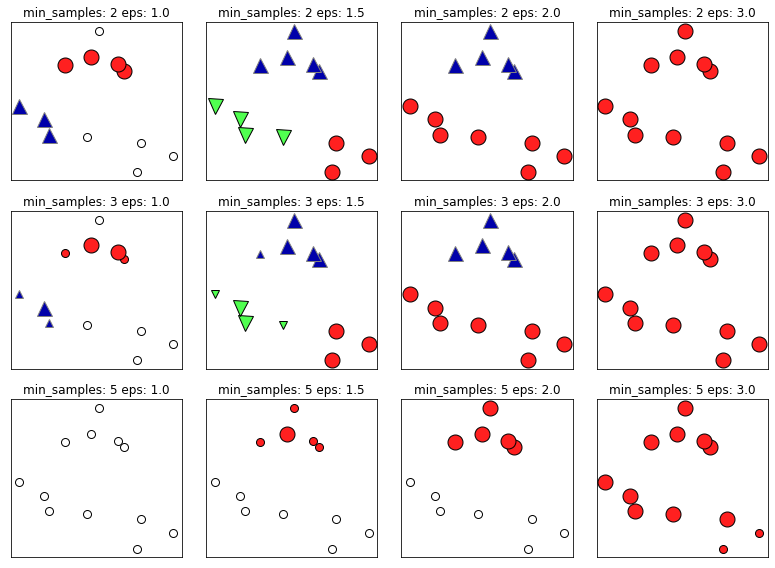

In [145]:
mglearn.plot_dbscan.plot_dbscan()